# CASE STUDY: BELLABEAT

<a id="Table-of-Contents"></a>
## TABLE OF CONTENTS

[1. ABOUT THE PROJECT](#about-the-project)

   [1.1. Scenario](#scenario)

   [1.2. Bellabeat products](#bellabeat-products)

   [1.3. Stakeholders](#stakeholders)
   
    
[2. ASK PHASE](#ask-phase)

   [2.1. Business Tasks](#business-tasks)

   [2.2. Guiding Questions](#guiding-questions)
    
[3. PREPARE PHASE](#prepare-phase)


[4. PROCESS PHASE](#process-phase)

   [4.1 Load library](#load-library)

   [4.2 Load data](#load-data)

   [4.3 Process data](#process-data)
   

[5. ANALYSIS AND VISUALIZATION PHASE](#analysis-and-visualization-phase)

   [5.1 Join data for analysis](#join-data-for-analysis)

   [5.2 Explore daily data](#explore-daily-data)

   [5.3 Explore hourly data](#explore-hourly-data)
   

[6. ACT PHASE](#act-phase)

## 1. ABOUT THE PROJECT <a id="about-the-project"></a>

[Back to Table of Contents](#Table-of-Contents)

**1.1 Scenario** <a id="scenario"></a>

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the
global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

**1.2 Bellabeat products** <a id="bellabeat-products"></a>
* Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress,menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.
* Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
* Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.
* Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
* Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

**1.3. Stakeholders** <a id="stakeholders"></a>
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy.

## 2. ASK PHASE <a id="ask-phase"></a>

[Back to Table of Contents](#Table-of-Contents)

**2.1 Business Tasks:** <a id="business-tasks"></a>
1. Conduct an analysis of Fitbit smart device usage data.
2. Identify key insights and trends from the analysis that reveal consumer behaviors and preferences regarding smart device usage.
3. Apply the insights from the smart device usage analysis to one of Bellabeat product and provide recommendations for its marketing strategy.

**2.2 Guiding Questions** <a id="guiding-questions"></a>
1. How are Fitbit users using Fitbit device to track their activities?
2. How activity affect users' sleep quality?
3. What is the frequency of daily activities?
4. What is the most active time? Least active time?
5. What type of activty burns calories the most?

## 3. PREPARE PHASE <a id='prepare-phase'></a>

[Back to Table of Contents](#Table-of-Contents)

**Data used:** 
The main data used for this analysis is the FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. These datasets were generated by respondents to a distributed survey via **Amazon Mechanical Turk** between **April 2016 to May 2016**.

The data set contains aggregated data collected on three levels, daily, hourly, and minute. Each data table represents a specific area of Fitbit users including activity intensity, activity time, calories burned, weight, sleep quality, etc.

Using ROCCC framework to assess credibility and bias of data
* Reliable: This data set is not reliable as it was collected from a third party (Amazon Mechanical Turk). Beside, there are no demographic information of the survey participants, which could potentially create bias.
* Original: This data set is not original as it was collected from a third party (Amazon Mechanical Turk), not directly from Fitbit.
* Comprehensive: The data is fairly comprehensive as the variables are somewhat self-explanatory. However, there are insufficient information on respondents regarding personal information like location, gender, age, occupations. Moreover, the fact that there is no explanations on the true meaning of variables may create inaccuracies and bias in analysis.
* Current: The data is not current as it was collected in 2016.
* Cited: The data is created by Amazon Mechanical Turk, but it lacks information on how data was collected.

In conclusion, this data set is **not** credible and may contain bias in analysis. Bellabeat should only view this analysis as initial insights to develop their marketing path in the future. Since Bellabeat users are female only, the analysis may contain bias. The correlations found between variables only suggest *correlations*, not *causation*.

Since dataset is available on Kaggle, analysis can be done directly on Kaggle’s jupyter notebook. This analysis will based mostly on users’ daily and minute-level data, including:
* dailyActivity_merged.csv - summary of calories and intensity
* sleepDay_merged.csv - total time asleep daily
* weightLogInfo_merged.csv - total weight record of users
* hourlyCalories_merged.csv - hourly calories burned
* hourlyIntensities_merged.csv - hourly intensity level
* hourlySteps_merged.csv - hourly total steps

## 4. PROCESS PHASE <a id='process-phase'></a>
Due to the large amount of data, I will use Python for ease of manipulations and visualization. 

[Back to Table of Contents](#Table-of-Contents)

**4.1. Load library** <a id='load-library'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**4.2. Load data** <a id ='load-data'></a>

[Back to Table of Contents](#Table-of-Contents)

In [2]:
activity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

**4.3. Process data** <a id='process-data'></a>

[Back to Table of Contents](#Table-of-Contents)

*4.3.1 activity*

In [3]:
# Preview and check data types
activity.head()
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

* ActivityDate needs to be changed to Date type
* Other variables are correct
* Dataset has no NA

In [4]:
# Check for unique entries
activity['Id'].nunique()

33

* There are 33 participants, creating a total of 940 observations

In [5]:
activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


* Mean daily steps is 7637, can be explored further using hourly data
* There are min values of 0 in total Steps, suggesting that participant does not move at all. This is unrealistic. However, given that this data is collected through survey, there may have been input error or mismatches in device trackings.

In [6]:
# Change ActivityDate to Date type and add 'Date' for inner join
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
activity['Date'] = activity['ActivityDate'].dt.date
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
# Check for duplicate
activity.duplicated().sum()

0

* Data set has no duplicates

*4.3.2 sleep*

In [8]:
# Preview and check data types
sleep.head()
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


* SleepDay needs to be change to Date type, and separate Date and Time

In [9]:
# Convert date and split date and time
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format = '%m/%d/%Y %I:%M:%S %p')
sleep['Date'] = sleep['SleepDay'].dt.date
sleep['Time'] = sleep['SleepDay'].dt.time
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,Time
0,1503960366,2016-04-12,1,327,346,2016-04-12,00:00:00
1,1503960366,2016-04-13,2,384,407,2016-04-13,00:00:00
2,1503960366,2016-04-15,1,412,442,2016-04-15,00:00:00
3,1503960366,2016-04-16,2,340,367,2016-04-16,00:00:00
4,1503960366,2016-04-17,1,700,712,2016-04-17,00:00:00


In [10]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


* Users sleeps at least 1 time per day, and at most 3 times per day
* Mean sleep time is 419 minutes
* Mean time in bed is 458 minutes

In [11]:
# Check for unique variables
sleep['Id'].nunique()

24

* There are 24 participants

In [12]:
# Check for duplicates
sleep.duplicated().sum()

3

* The data set has 3 duplicates

In [13]:
# Remove duplicates
sleep.drop_duplicates(inplace=True)

*4.3.3 weight*

In [14]:
# Preview and check data types
weight.head()
weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


* Data set has 65 missing values in Fat
* Date needs to be changed to Date type

In [15]:
# Check for unique values
weight['Id'].nunique()

8

Data set only has 8 participants, which could cause sampling bias. Therefore weight should be omitted from analysis

*4.3.4 calories*

In [16]:
# Preview and check data types
calories.head()
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


* Data set has no NA
* ActivityHour needs to be changed to Date, and separate Date and Time

In [17]:
# Data type correction
calories['ActivityHour'] = pd.to_datetime(calories['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
calories['Date'] = calories['ActivityHour'].dt.date
calories['Time'] = calories['ActivityHour'].dt.time
calories.head()

,Id,ActivityHour,Calories,Date,Time
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00


In [18]:
# Check for unique values
calories['Id'].nunique()

33

* Data set has 33 participants

In [19]:
# Check for duplicates
calories.duplicated().sum()

0

* Calories has no duplicates

*4.3.5 intensities*

In [20]:
intensity.head()
intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


* Data set has no N/A
* ActivyHour needs to be changed to date type, and separate Date and Time

In [21]:
# Data type correction
intensity['ActivityHour'] = pd.to_datetime(intensity['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
intensity['Date'] = intensity['ActivityHour'].dt.date
intensity['Time'] = intensity['ActivityHour'].dt.time
intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Date,Time
0,1503960366,2016-04-12 00:00:00,20,0.333333,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.133333,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.116667,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.000000,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.000000,2016-04-12,04:00:00


In [22]:
# Check for unique values
intensity['Id'].nunique()

33

* Data set has 33 participants

In [23]:
# Check for duplicates
intensity.duplicated().sum()

0

* Data set has no duplicates

*4.3.6 steps*

In [24]:
# Preview and check data types
steps.head()
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


* ActivityHour needs to be changed to Date type, and separate Date and Time

In [25]:
# Data type correction
steps['ActivityHour'] = pd.to_datetime(steps['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
steps['Date'] = steps['ActivityHour'].dt.date
steps['Time'] = steps['ActivityHour'].dt.time
steps.head()

,Id,ActivityHour,StepTotal,Date,Time
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00


In [26]:
# Check for unique values
steps['Id'].nunique()

33

* Data set has 33 participants

In [27]:
# Check for duplicates
steps.duplicated().sum()

0

* Data set has no duplicates

**Conclustions after initial preparation**

* weight has too small sample size, hence should be omitted from analysis
* sleep only has 24 participants, all other data sets have 33 parcipants
* all hourly data has the same amount of participants and data collected, therefore can be aggregated into 1 table
* Although sleep and activity have mismatch in number of participants, they can also be inner joined for further explorations.

## 5. ANALYSIS AND VISUALIZATION PHASE <a id='analysis-and-visualization-phase'></a>

[Back to Table of Contents](#Table-of-Contents)

Now that data are cleaned and error-proofed. I can analyze trends and insights through daily data and hourly data. However, before analysis, daily and hourly data need to be joined.

**5.1. Join data for analysis** <a id='join-data-for-analysis'></a>

In [28]:
# Inner join hourly data set for analysis
hourly_df = pd.merge(calories, intensity, on = ['Id', 'ActivityHour', 'Date', 'Time'], how = 'inner')
hourly_df = pd.merge(hourly_df, steps, on = ['Id', 'ActivityHour', 'Date', 'Time'], how = 'inner')
hourly_df.head()
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   Date              22099 non-null  object        
 4   Time              22099 non-null  object        
 5   TotalIntensity    22099 non-null  int64         
 6   AverageIntensity  22099 non-null  float64       
 7   StepTotal         22099 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.5+ MB


In [29]:
# Inner join daily data
daily_df = pd.merge(activity, sleep, on = ['Id', 'Date'], how = 'inner')
daily_df.head()
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   ActivityDate              410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

**5.2. Explore daily data** <a id='explore-daily-data'></a>

[Back to Table of Contents](#Table-of-Contents)

Assumption: According to Fitbit's definition, each active minute equals [10 minutes or more of continuous moderate-to-intense activity](https://help.fitbit.com/articles/en_US/Help_article/1379.htm). [LightlyActiveMinutes](https://www.verywellfit.com/why-active-minutes-mean-more-than-steps-4155747) represent lightly intensity activities such as daily walk. [FairlyActiveMinutes](https://www.verywellfit.com/why-active-minutes-mean-more-than-steps-4155747) represents moderate-intensity activities. [VeryActiveMinutes](https://www.verywellfit.com/why-active-minutes-mean-more-than-steps-4155747) indicate vigorous-intensity exercise. Therefore, we can assume that the sum of *FairlyActiveMinutes* and *VeryActiveMinutes* represents total exercise time of users, represented by "*TotalExerciseMinutes*".

In [30]:
# Add TotalExerciseMinutes and TotalActiveMinutes
daily_df['TotalExerciseMinutes'] = daily_df['VeryActiveMinutes'] + daily_df['FairlyActiveMinutes']
daily_df['TotalActiveMinutes'] = daily_df['TotalExerciseMinutes'] + daily_df['LightlyActiveMinutes']
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,SedentaryMinutes,Calories,Date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time,TotalExerciseMinutes,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,728,1985,2016-04-12,2016-04-12,1,327,346,00:00:00,38,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,776,1797,2016-04-13,2016-04-13,2,384,407,00:00:00,40,257
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,726,1745,2016-04-15,2016-04-15,1,412,442,00:00:00,63,272
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,773,1863,2016-04-16,2016-04-16,2,340,367,00:00:00,46,267
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,539,1728,2016-04-17,2016-04-17,1,700,712,00:00:00,58,222


In [31]:
# Add DayOfWeek column to identify day of week
daily_df['DayOfWeek'] = daily_df['ActivityDate'].dt.dayofweek
daily_df['DayOfWeek'] = daily_df['DayOfWeek'].map({
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday'
})
daily_df['DayOfWeek'] = pd.Categorical(daily_df['DayOfWeek'], categories=['Monday',
                                                                          'Tuesday',
                                                                          'Wednesday',
                                                                          'Thursday',
                                                                          'Friday','Saturday',
                                                                          'Sunday'], 
                                       ordered=True)
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,Date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time,TotalExerciseMinutes,TotalActiveMinutes,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,2016-04-12,2016-04-12,1,327,346,00:00:00,38,366,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2016-04-13,2016-04-13,2,384,407,00:00:00,40,257,Wednesday
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,2016-04-15,2016-04-15,1,412,442,00:00:00,63,272,Friday
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2016-04-16,2016-04-16,2,340,367,00:00:00,46,267,Saturday
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,1728,2016-04-17,2016-04-17,1,700,712,00:00:00,58,222,Sunday


In [32]:
# Summary by Activity
daily_df[['TotalSteps',
         'Calories',
         'TotalExerciseMinutes',
         'TotalActiveMinutes',
         'VeryActiveMinutes',
         'FairlyActiveMinutes',
         'LightlyActiveMinutes',
         'SedentaryMinutes']].describe()

,TotalSteps,Calories,TotalExerciseMinutes,TotalActiveMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,8514.909756,2389.295122,42.970732,259.512195,25.046341,17.924390,216.541463,712.100000
std,4157.375584,758.435040,48.360243,92.173330,36.218237,22.418593,86.705299,166.179395
min,17.000000,257.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5188.750000,1841.000000,0.000000,206.500000,0.000000,0.000000,158.000000,631.250000
50%,8913.000000,2207.000000,30.000000,263.500000,9.000000,11.000000,208.000000,717.000000
75%,11370.250000,2920.000000,67.750000,315.500000,38.000000,26.750000,263.000000,782.750000
max,22770.000000,4900.000000,275.000000,540.000000,210.000000,143.000000,518.000000,1265.000000


* On average, Fitbit users'daily steps are 8,515, which is lower than tergeted 10,000 steps recommended by CDC
* Among 259 active minutes, only 1/6 (43 minutes) are spent on exercises.
* Sedentary time are 2.7 times higher than Active time (92 minutes), and 16.5 times high than Exercise time (43 minutes)

In [33]:
# On what days do users exercise most?
DayOfWeek_Summary = daily_df.groupby('DayOfWeek')[['TotalActiveMinutes',
                                                'TotalExerciseMinutes',
                                                'VeryActiveMinutes',
                                                'FairlyActiveMinutes',
                                                'LightlyActiveMinutes',
                                                'SedentaryMinutes']].mean().reset_index()
DayOfWeek_Summary

,DayOfWeek,TotalActiveMinutes,TotalExerciseMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,Monday,272.173913,49.804348,30.717391,19.086957,222.369565,718.413043
1,Tuesday,267.246154,50.661538,30.615385,20.046154,216.584615,740.046154
2,Wednesday,246.045455,38.075758,21.333333,16.742424,207.969697,714.454545
3,Thursday,241.656250,38.718750,22.859375,15.859375,202.937500,698.375000
4,Friday,258.421053,35.736842,21.157895,14.578947,222.684211,743.087719
5,Saturday,297.052632,50.280702,27.561404,22.719298,246.771930,680.438596
6,Sunday,238.945455,38.909091,22.145455,16.763636,200.036364,687.636364


* Saturday has highest Active Time, next comes Monday and Tuesday.
* Tuesday has highest Exercise Time, next comes Saturday and Monday

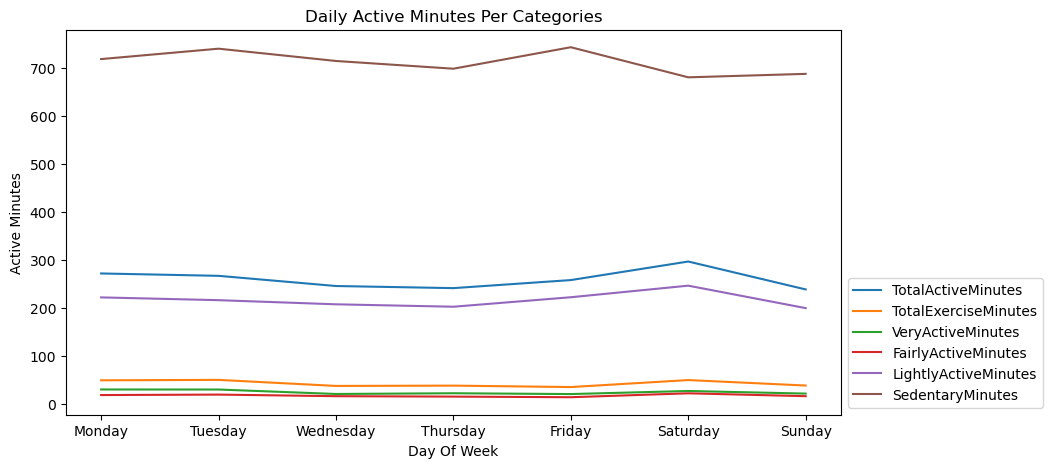

In [34]:
# Plot it on a graph
ycols = ['TotalActiveMinutes',
        'TotalExerciseMinutes',
        'VeryActiveMinutes',
        'FairlyActiveMinutes',
        'LightlyActiveMinutes',
        'SedentaryMinutes']
plt.figure(figsize=(10,5))
plt.plot(DayOfWeek_Summary['DayOfWeek'],
        DayOfWeek_Summary[ycols], label=ycols)
plt.xlabel('Day Of Week')
plt.ylabel('Active Minutes')
plt.title('Daily Active Minutes Per Categories')
plt.legend(bbox_to_anchor=(1,0), loc='lower left')

* Saturday is the most active day and lowest Sedendary Time
* Friday has the most Sedentary Time.
* Interestingly, although Tuesday has the highest Exercise time, Sedentary time is also the second highest.

In [35]:
# Is exercise related to sleep quality?
correlation_matrix = daily_df[['TotalMinutesAsleep',
                              'TotalSteps',
                              'TotalActiveMinutes',
                              'TotalExerciseMinutes',
                              'VeryActiveMinutes',
                              'FairlyActiveMinutes',
                              'LightlyActiveMinutes',
                              'SedentaryMinutes',
                              'Calories']].corr()
correlation_matrix

,TotalMinutesAsleep,TotalSteps,TotalActiveMinutes,TotalExerciseMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
TotalMinutesAsleep,1.000000,-0.190344,-0.069294,-0.181527,-0.088127,-0.249208,0.027583,-0.601073,-0.031699
TotalSteps,-0.190344,1.000000,0.744648,0.670820,0.543694,0.568696,0.417457,-0.130036,0.406301
TotalActiveMinutes,-0.069294,0.744648,1.000000,0.372048,0.278751,0.352228,0.855553,-0.262689,0.389983
TotalExerciseMinutes,-0.181527,0.670820,0.372048,1.000000,0.898613,0.705400,-0.162243,-0.031330,0.539326
VeryActiveMinutes,-0.088127,0.543694,0.278751,0.898613,1.000000,0.322896,-0.204874,-0.016484,0.611198
FairlyActiveMinutes,-0.249208,0.568696,0.352228,0.705400,0.322896,1.000000,-0.018999,-0.040954,0.175988
LightlyActiveMinutes,0.027583,0.417457,0.855553,-0.162243,-0.204874,-0.018999,1.000000,-0.261781,0.113766
SedentaryMinutes,-0.601073,-0.130036,-0.262689,-0.031330,-0.016484,-0.040954,-0.261781,1.000000,0.098656
Calories,-0.031699,0.406301,0.389983,0.539326,0.611198,0.175988,0.113766,0.098656,1.000000


* *TotalMinutesAsleep* shows weak negative relationship with exercise time and activity time in general. 
* On the contrary, *SedentaryMinutes* has a high negative correlation with *TotalMinutesAsleep*.
--> Exercises may not increase sleep quality, but keeping SedentaryMinutes low may increase sleep quality. Moreover, LightlyActiveMinutes has a positive correlation with TotalMinutesAsleep, suggesting that light walking may increase sleep quality. 

* *Calories* has quite high positive correlation with *ActiveMinutes* variables, with correlation coefficient of 0.41 for *TotalSteps*, 0.39 for *TotalActiveMinutes*, 0.54 for *TotalExerciseMinutes* and 0.61 for *VeryActiveMinutes*. This suggests that while Exercises in general help burns calories, Virgorous-Intensity exercises contributes the most to Calories burning.

Text(0.5, 1.0, 'Correlation heatmap: Total Minutes Asleep vs. Active Time')

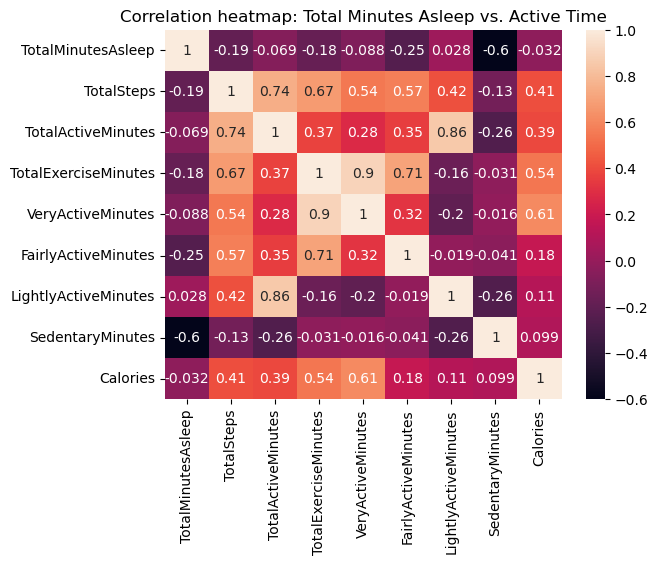

In [36]:
# Sleep correlation
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation heatmap: Total Minutes Asleep vs. Active Time')

Regression equation: TotalMinutesAsleep = -0.429108 * SedentaryMinutes + 724.740787
R-squared = 0.3612889192653306


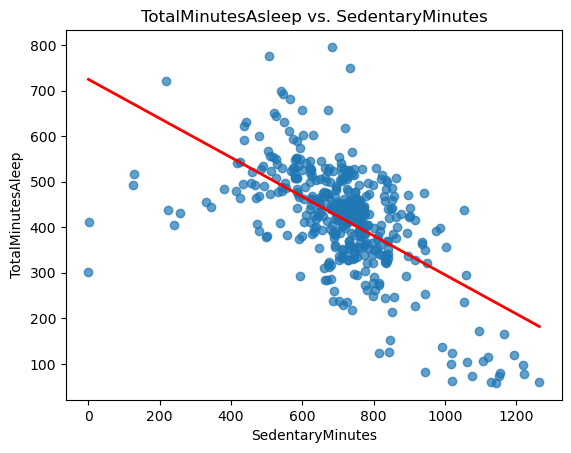

In [37]:
# Sleep vs. Sedentary Minutes
plt.scatter(daily_df['SedentaryMinutes'], daily_df['TotalMinutesAsleep'], alpha = 0.7)
plt.ylabel('TotalMinutesAleep')
plt.xlabel('SedentaryMinutes')
plt.title('TotalMinutesAsleep vs. SedentaryMinutes')

# Add a trendline
slope, intercept = np.polyfit(daily_df['SedentaryMinutes'],daily_df['TotalMinutesAsleep'],1)
x_fit = np.array([min(daily_df['SedentaryMinutes']),
                 max(daily_df['SedentaryMinutes'])])
y_fit = slope*x_fit + intercept
plt.plot(x_fit, y_fit, color = 'red', linewidth=2)
print(f'Regression equation: TotalMinutesAsleep = {slope:2f} * SedentaryMinutes + {intercept:2f}')

# Calculate R-squared
MeanMinutesAsleep = daily_df['TotalMinutesAsleep'].mean()
residual = daily_df['TotalMinutesAsleep'] - (slope * daily_df['SedentaryMinutes'] + intercept)
SS_res = np.sum(residual**2)
SS_tot = np.sum((daily_df['TotalMinutesAsleep'] - MeanMinutesAsleep)**2)
R_squared = 1 - (SS_res/SS_tot)
print('R-squared =', R_squared)

* Correlation suggests that Sedentary time has a fair negative relationship with TotalTimeAsleep (-0.6)
* Although SedentaryMinutes and TotalMinutesAsleep have a linear relationship, the regression line has a very low R-squared and can only explain 36% of change in TotalMinutesAsleep per 1 incremental value of SedentaryMinutes
* The regression model suggest correlation, not causation. Moreover, small sample size (33 participants) caused prediction model to be inaccurate, hence cannot be used to predict the rate of sleep quality improvement as sedentary time decreases. At this point, I can only conclude that reducing sedentary may help improve sleep quality. 

To support this finding, I can perform a test so check whether people with lower sedentary has better sleep.

According to VeryWellHealth, [spending four to six waking hour sitting or lying is considered sedentary lifestyles](https://www.verywellhealth.com/how-to-beat-a-sedentary-lifestyle-2509611). Therefore, I assume that people with more than 6 hours (360 minutes) of SedentaryMinutes are *high* SedentaryLevel. On the contrary, those that have less than or equal to 6 hours of Sedentary belong to the *low* SedentaryLevel group.

In [38]:
# Add SedentaryLevel colum
daily_df['SedentaryLevel'] = daily_df['SedentaryMinutes'].apply(lambda x: 'high' if x > 360 else 'low')
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Time,TotalExerciseMinutes,TotalActiveMinutes,DayOfWeek,SedentaryLevel
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,2016-04-12,2016-04-12,1,327,346,00:00:00,38,366,Tuesday,high
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,2016-04-13,2016-04-13,2,384,407,00:00:00,40,257,Wednesday,high
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,2016-04-15,2016-04-15,1,412,442,00:00:00,63,272,Friday,high
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,2016-04-16,2016-04-16,2,340,367,00:00:00,46,267,Saturday,high
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,2016-04-17,2016-04-17,1,700,712,00:00:00,58,222,Sunday,high


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'SedentaryMinutes vs. TotalMinutesAsleep by SedentaryLevel')

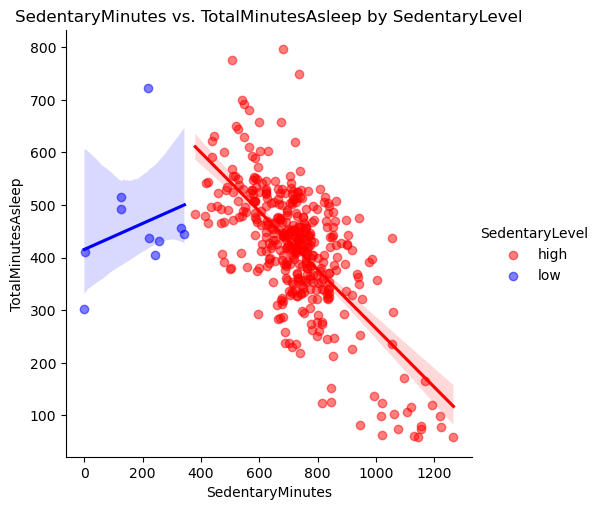

In [39]:
# Plot a scatter plot with trendlines for each Sedentary Level
color_map = {'low':'blue', 'high':'red'}
sns.lmplot(data=daily_df, x='SedentaryMinutes', y='TotalMinutesAsleep', hue='SedentaryLevel', palette=color_map, scatter_kws={'alpha':0.5})
plt.title('SedentaryMinutes vs. TotalMinutesAsleep by SedentaryLevel')

* As clearly shown on the chart, people with high sedentary level have their TotalMinutesAsleep shrinking as SedentaryMinutes increase, which is correspondent to regression equation.
* Interestingly, people with low sedentary level also have their TotalMinutesAsleep increase along with SedentaryMinutes. However, this finding falls under population bias as there are only few cases fall into this category, 2 of which has 0 SedentaryMinutes which is unrealistic.

**5.3. Explore hourly data** <a id='explore-hourly-data'></a>

[Back to Table of Contents](#Table-of-Contents)

As daily_df records calories burned and intensity level by the hour, I can use this data to explore further the relationship between Activity Intensity and Calories burned.

In [40]:
hourly_df.head()
hourly_df.describe()

,Id,Calories,TotalIntensity,AverageIntensity,StepTotal
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,97.386760,12.035341,0.200589,320.166342
std,2.422500e+09,60.702622,21.133110,0.352219,690.384228
min,1.503960e+09,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,948.000000,180.000000,3.000000,10554.000000


* Mean Calories burned is 97, while max is 948 and min is 42. This huge gap could be caused by outliners.
* Max StepTotal is 10554 while min is only 320, this indicates an intensive training or unsual activity.

Text(0.5, 1.0, 'Correlation: Calories vs. TotalIntensity vs. StepTotal')

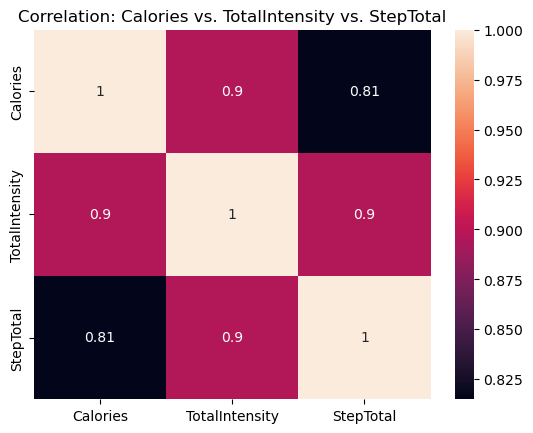

In [41]:
# How calories be affected by ActivityIntensity?

hourly_corr = hourly_df[['Calories',
                      'TotalIntensity',
                      'StepTotal']].corr()
sns.heatmap(hourly_corr, annot=True)
plt.title('Correlation: Calories vs. TotalIntensity vs. StepTotal')

* Both *Intensity* and *StepTotal* have high positive correlation with *Calories* (0.81)
* *TotalIntensity* ranges from 0 to 180. Assume that TotalIntensity from 0 to 60 are *low* in IntensityLevel, 61 to 120 are *medium* in IntensityLevel, and from 121 to 180 are *high* IntensityLevel.

In [42]:
# Add IntensityLevel
hourly_df['IntensityLevel'] = hourly_df['TotalIntensity'].apply(lambda x:'low' if x <= 60 else ('medium' if 60 < x <= 120 else 'high'))
hourly_df.head()

,Id,ActivityHour,Calories,Date,Time,TotalIntensity,AverageIntensity,StepTotal,IntensityLevel
0,1503960366,2016-04-12 00:00:00,81,2016-04-12,00:00:00,20,0.333333,373,low
1,1503960366,2016-04-12 01:00:00,61,2016-04-12,01:00:00,8,0.133333,160,low
2,1503960366,2016-04-12 02:00:00,59,2016-04-12,02:00:00,7,0.116667,151,low
3,1503960366,2016-04-12 03:00:00,47,2016-04-12,03:00:00,0,0.000000,0,low
4,1503960366,2016-04-12 04:00:00,48,2016-04-12,04:00:00,0,0.000000,0,low


Regression Equation: Calories = 0.071657 * StepTotal + 74.444679
R-Squared = 0.664173


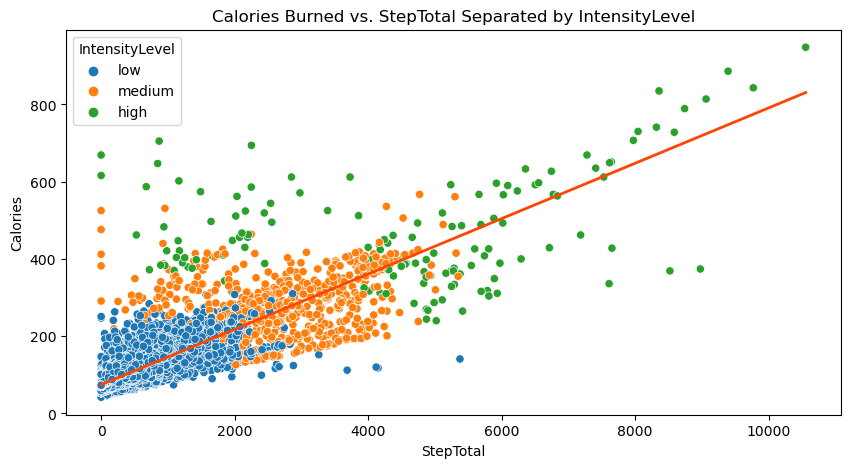

In [43]:
# Plot it on a chart for further visualization
plt.figure(figsize = (10,5))
sns.scatterplot(data=hourly_df, x='StepTotal', y='Calories', hue='IntensityLevel')
plt.title('Calories Burned vs. StepTotal Separated by IntensityLevel')

# Add a trendline
slope, intercept = np.polyfit(hourly_df['StepTotal'], hourly_df['Calories'],1)
x_fit = np.array([min(hourly_df['StepTotal']), max(hourly_df['StepTotal'])])
y_fit = slope*x_fit + intercept
plt.plot(x_fit, y_fit, color='orangered', linewidth=2)
print(f'Regression Equation: Calories = {slope:2f} * StepTotal + {intercept:2f}')

# Calculate R-squared
MeanCalories = hourly_df['Calories'].mean()
residual = hourly_df['Calories'] - (slope*hourly_df['StepTotal'] + intercept)
SS_res = np.sum(residual**2)
SS_tot = np.sum((hourly_df['Calories'] - MeanCalories)**2)
R_squared = 1 - (SS_res/SS_tot)
print(f'R-Squared = {R_squared:2f}')

* The equation has R-squared of 0.66, meaning that 66 percent of changes in Calories can be explained by 1 incremental change in TotalSteps. Although R-squared is not very high, it is somewhat reliable to predict changes in Calories. Walking 10,000 step daily can help burn up to 791 Calories.

* There are moment when users burned calories without taking additional steps or with very little steps, suggesting that users are doing virgorous-intensity exercise such as weight-lifting or swimming. However, the most calories burned are still earned through walking (66%) as intensity level also increases along side with StepTotal.

In [44]:
# During what time do users burn the most calories?
# Aggregate data by hour
hourly_sum = hourly_df.groupby('Time')['Calories',
                                      'TotalIntensity',
                                      'StepTotal'].mean().reset_index()
hourly_sum

/tmp/ipykernel_20/1865268520.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_sum = hourly_df.groupby('Time')['Calories',


,Time,Calories,TotalIntensity,StepTotal
0,00:00:00,71.805139,2.129550,42.188437
1,01:00:00,70.165059,1.419078,23.102894
2,02:00:00,69.186495,1.043944,17.110397
3,03:00:00,67.538049,0.443730,6.426581
4,04:00:00,68.261803,0.633047,12.699571
5,05:00:00,81.708155,4.950644,43.869099
6,06:00:00,86.996778,7.771214,178.508056
7,07:00:00,94.477981,10.733620,306.049409
8,08:00:00,103.337272,14.668099,427.544576
9,09:00:00,106.142857,15.387755,433.301826


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


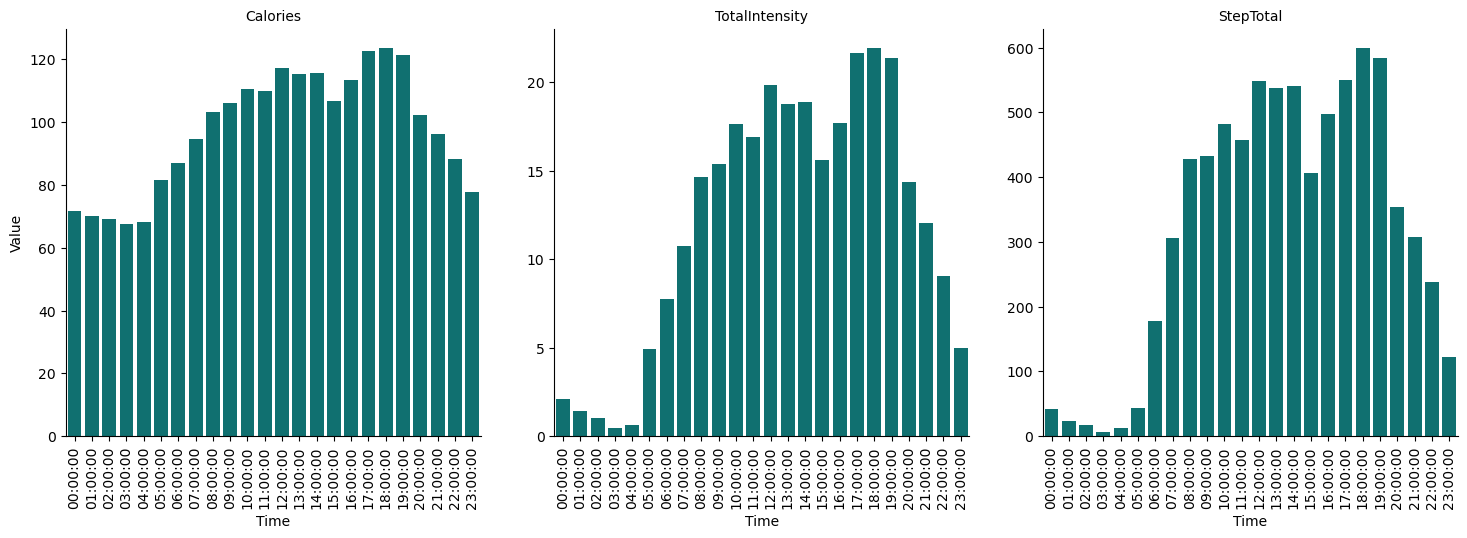

In [45]:
# Plot it on a chart

# Melt data for better visualization
melted_df = pd.melt(hourly_sum, 
                    id_vars='Time', 
                    value_vars=['Calories','TotalIntensity','StepTotal'],
                    var_name='Metrics',
                    value_name='Value')

# Barplots with facet grid
p = sns.FacetGrid(melted_df, col='Metrics', col_wrap=3, height=5, sharey=False)
p.map_dataframe(sns.barplot, x='Time', y='Value', color='teal')
p.set_titles(col_template='{col_name}')
p.set_axis_labels('Time','Value')
p.set_xticklabels(rotation=90)

* The most active time is from 5PM to 7PM, with highest calories burned along with highest intensity and the most step taken.
* Activity level increases gradually during the day and reaches its first peak at noon, then slowly reclines to its lowest point at 3PM. After that, activity gains recovery to peak again at 6PM, then plummet to its bottom at 3AM. 
* Sedentary time starts from 11PM and ends at 6AM
* We can visualize a typical day of users starting at 6PM, working until 12PM, getting off work at 5PM, then going to sleep at 11PM.

## 6. ACT PHASE <a id='act-phase'></a>

[Back to Table of Contents](#Table-of-Contents)

**Marketing recommendations for Bellabeat**

*Key takeaways from the analysis*
* Sedentary time is highly related to sleep quality. Walking 10,000 step daily can help burn up to 791 Calories.
* The amount of exercise is not evenly distributed throughout the week
* Exercise intensity is not linearly related with calories burned. Users would benefit most from a combination of 10,000 steps daily and moderate-intensity exercise.

-> The key is to keep users *stay motivated* to maintain exercise throughout the week, through which helps them control weight and improve sleep quality

***Value Proposition***

Help Bellabeat users improve life quality through incremental plan for daily exercises.

***Marketing Idea***

It's hard to always be motivated for exercise, expecially when users have to deal with daily hassle of work-life balance because exercises take time. Bellabeat can calculate users's daily schedule and detect sedentary time to push notifications for short, moderate exercises (10-20 mins) multiple time during the day. In other to increase motivation, Bellabeat will show users how much calories they burned after each exercise, and give a recap of total calories burned daily together with sleep quality recorded, so that users can see their exercise results. The notifications will be designed with incremental motivation messages and specific goals for users to follow.